In [1]:
import pyspedas
import pytplot
from pytplot import options, tplot, tlimit, tplot_options, get_data, store_data
from load import mca, orb
import numpy as np

tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT


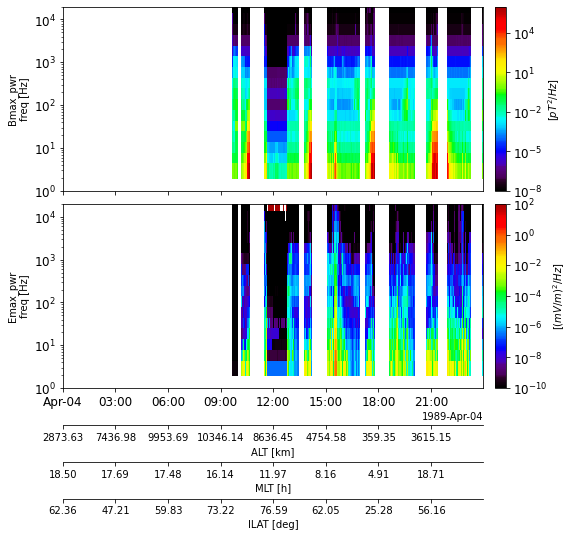

In [16]:
date = '1989-04-04'
orb([date+' 00:00:00', date+' 23:59:59'])
mca([date+' 00:00:00', date+' 23:59:59'])
tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']

    #dB to amplitude
for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_float = (tplot_variable.y).astype(float)
    np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
    tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)  / bandwidth
    pytplot.store_data(tplot_names[i] +'_amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
    pytplot.store_data(tplot_names[i] +'_pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})
    
pyspedas.tinterpol('akb_ILAT', interp_to='Emax_pwr', newname = 'ILAT')
pyspedas.tinterpol('akb_ALT', interp_to='Emax_pwr', newname = 'ALT')
pyspedas.tinterpol('akb_MLT', interp_to='Emax_pwr', newname = 'MLT', method = 'nearest')

options(['Emax_pwr', 'Bmax_pwr' ], 'spec', 1)
options(['Emax_pwr', 'Bmax_pwr' ], 'ylog', 1)
options(['Emax_pwr', 'Bmax_pwr' ], 'zlog', 1)
options(['Emax_pwr', 'Bmax_pwr' ], 'yrange', [1, 2e4])
options(['Emax_pwr', 'Bmax_pwr' ], 'ysubtitle', 'freq [Hz]')

options('Emax_pwr', 'zrange', [1e-10, 100])
options('Bmax_pwr', 'zrange', [1e-8, 1e6])
options('Emax_pwr', 'ztitle', '$[(mV/m)^2/Hz]$')
options('Bmax_pwr', 'ztitle', '$[pT^2/Hz]$')
            
options('ALT', 'ytitle', 'ALT [km]')
options('MLT', 'ytitle', 'MLT [h]')
options('ILAT', 'ytitle', 'ILAT [deg]')
options(['ALT', 'MLT', 'ILAT'], 'panel_size', 0.3)

tlimit([date+' 00:00:00', date+' 23:59:00'])
tplot(['Bmax_pwr', 'Emax_pwr'], var_label = ['ALT', 'MLT', 'ILAT'])

In [15]:
ILAT = get_data('akb_ILAT')
ILAT.y

array([62.36, 63.16, 63.99, ..., 48.42, 48.33, 48.24])

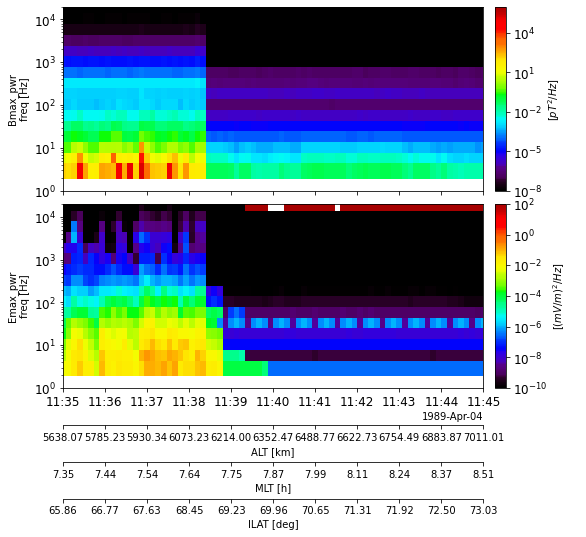

In [19]:
tlimit([date+' 11:35:00', date+' 11:45:00'])
tplot(['Bmax_pwr', 'Emax_pwr'], var_label = ['ALT', 'MLT', 'ILAT'])

In [5]:
start_day_string = '1991-01-01'
start_day_time_double = pyspedas.time_double(start_day_string)
seconds_per_day = 86400
day_list = []
for i in range(0, 366):
    time_double = start_day_time_double + i * seconds_per_day
    day_list.append(pyspedas.time_string(time_double, fmt='%Y-%m-%d %H:%M:%S'))
day_list

for i in range(len(day_list)-1):
    trange = [day_list[i], day_list[i+1]]
    mca(trange=trange, downloadonly=True)
    print(trange)


['1991-01-01 00:00:00', '1991-01-02 00:00:00']
['1991-01-02 00:00:00', '1991-01-03 00:00:00']
['1991-01-03 00:00:00', '1991-01-04 00:00:00']
['1991-01-04 00:00:00', '1991-01-05 00:00:00']
['1991-01-05 00:00:00', '1991-01-06 00:00:00']
['1991-01-06 00:00:00', '1991-01-07 00:00:00']
['1991-01-07 00:00:00', '1991-01-08 00:00:00']
['1991-01-08 00:00:00', '1991-01-09 00:00:00']
['1991-01-09 00:00:00', '1991-01-10 00:00:00']
['1991-01-10 00:00:00', '1991-01-11 00:00:00']
['1991-01-11 00:00:00', '1991-01-12 00:00:00']
['1991-01-12 00:00:00', '1991-01-13 00:00:00']
['1991-01-13 00:00:00', '1991-01-14 00:00:00']
['1991-01-14 00:00:00', '1991-01-15 00:00:00']
['1991-01-15 00:00:00', '1991-01-16 00:00:00']
['1991-01-16 00:00:00', '1991-01-17 00:00:00']
['1991-01-17 00:00:00', '1991-01-18 00:00:00']
['1991-01-18 00:00:00', '1991-01-19 00:00:00']
['1991-01-19 00:00:00', '1991-01-20 00:00:00']
['1991-01-20 00:00:00', '1991-01-21 00:00:00']
['1991-01-21 00:00:00', '1991-01-22 00:00:00']
['1991-01-22 

In [6]:
trange = ['1991-06-11', '1991-06-12']
orb(trange=trange)
a = pytplot.tplot_names(True)
a

['akb_Pass', 'akb_ILAT', 'akb_MLAT', 'akb_MLT', 'akb_ALT']

In [7]:
pytplot.store_data(a, delete=True)
pytplot.tplot_names()

[]

In [57]:
tplot_names = ["Emax", "Eave", "Bmax", "Bave"]
for tplot_name in tplot_names:
    tplot_variable = pytplot.get_data(tplot_name)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_Amplitude = (10**(tplot_variable.y/20)) * (tplot_variable_0dB**2) / bandwidth 
    store_data(tplot_name +'_Amp', data={'x': tplot_variable.times, 'y': tplot_variable_Amplitude, 'v': tplot_variable.v})

pytplot.tplot_names()

0 : Emax
1 : Eave
2 : Bmax
3 : Bave
4 : PostGap
5 : akb_Pass
6 : akb_ILAT
7 : akb_MLAT
8 : akb_MLT
9 : akb_ALT
10 : Emax_Amp
11 : Eave_Amp
12 : Bmax_Amp
13 : Bave_Amp
14 : akb_ILAT-itrp
15 : ILAT
16 : MLAT
17 : Emax_channel1
18 : Emax_channel2
19 : Emax_channel3
20 : Emax_channel4
21 : Emax_channel5
22 : Emax_channel6
23 : Emax_channel7
24 : Amplitude at 3.16-100 Hz  data from:  Emax_channel2 Emax_channel3 Emax_channel4 Emax_channel5 Emax_channel6 Emax_channel7


['Emax',
 'Eave',
 'Bmax',
 'Bave',
 'PostGap',
 'akb_Pass',
 'akb_ILAT',
 'akb_MLAT',
 'akb_MLT',
 'akb_ALT',
 'Emax_Amp',
 'Eave_Amp',
 'Bmax_Amp',
 'Bave_Amp',
 'akb_ILAT-itrp',
 'ILAT',
 'MLAT',
 'Emax_channel1',
 'Emax_channel2',
 'Emax_channel3',
 'Emax_channel4',
 'Emax_channel5',
 'Emax_channel6',
 'Emax_channel7',
 'Amplitude at 3.16-100 Hz  data from:  Emax_channel2 Emax_channel3 Emax_channel4 Emax_channel5 Emax_channel6 Emax_channel7']

In [39]:
pyspedas.tinterpol('akb_ILAT', interp_to='Emax_Amp', newname = 'ILAT')
pyspedas.tinterpol('akb_MLAT', interp_to='Emax_Amp', newname = 'MLAT')
Emax = get_data('Emax_Amp')
time, Emax = Emax.times, Emax.y
ILAT = get_data('ILAT')
ILAT = ILAT.y
MLAT = get_data('MLAT')
MLAT = MLAT.y

plus_index_tuple = np.where((MLAT>0) & (ILAT>65))
minus_index_tuple = np.where((MLAT<0) & (ILAT>65))

plus_index = plus_index_tuple[0]
minus_index = minus_index_tuple[0]

#make start_time list, end_time list
plus_start_time_index = [plus_index[0]]
plus_end_time_index = []
for i in range(plus_index.size-1):
    if plus_index[i+1] - plus_index[i] > 1:
        plus_end_time_index.append(plus_index[i])
        plus_start_time_index.append(plus_index[i+1])
        
plus_end_time_index.append(plus_index[-1])

plus_start_time_index = np.array(plus_start_time_index)
plus_end_time_index = np.array(plus_end_time_index)

plus_start_time_list = pyspedas.time_string(time[plus_start_time_index], fmt='%Y-%m-%d %H:%M:%S')
plus_end_time_list = pyspedas.time_string(time[plus_end_time_index], fmt='%Y-%m-%d %H:%M:%S')

plus_start_time_list[0], plus_end_time_list[0]

tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT


('1991-07-11 02:13:56', '1991-07-11 03:04:52')

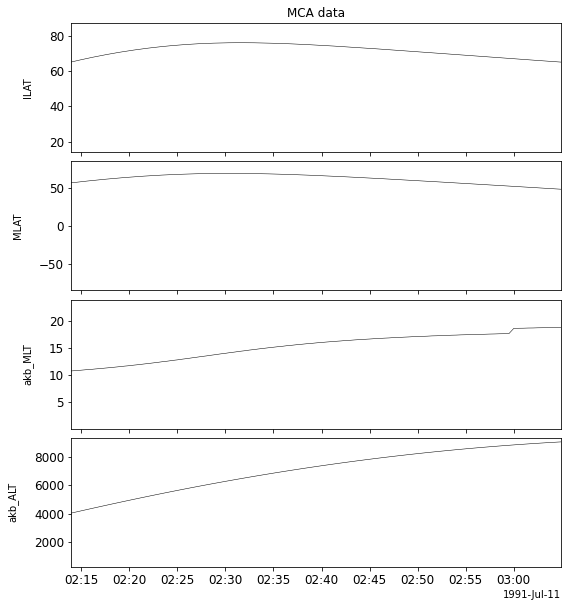

In [42]:
start_time = plus_start_time_list[0]
end_time = plus_end_time_list[0]
pytplot.tlimit([start_time,end_time])
pytplot.tplot(['ILAT', 'MLAT', 'akb_MLT', 'akb_ALT'])

In [63]:
Emax = get_data('Emax_Amp')
Emax.v, Emax.y.T[0].size
Emax_channel1 = Emax.y.T[0]
Emax_channel2 = Emax.y.T[1]
Emax_channel3 = Emax.y.T[2]
Emax_channel4 = Emax.y.T[3]
Emax_channel5 = Emax.y.T[4]
Emax_channel6 = Emax.y.T[5]
Emax_channel7 = Emax.y.T[6]

store_data(name = 'Emax_channel1', data={'x':time, 'y':Emax_channel1})
store_data(name = 'Emax_channel2', data={'x':time, 'y':Emax_channel2})
store_data(name = 'Emax_channel3', data={'x':time, 'y':Emax_channel3})
store_data(name = 'Emax_channel4', data={'x':time, 'y':Emax_channel4})
store_data(name = 'Emax_channel5', data={'x':time, 'y':Emax_channel5})
store_data(name = 'Emax_channel6', data={'x':time, 'y':Emax_channel6})
store_data(name = 'Emax_channel7', data={'x':time, 'y':Emax_channel7})

colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]

options('Emax_channel1', 'color', colorlist[0])
options('Emax_channel2', 'color', colorlist[1])
options('Emax_channel3', 'color', colorlist[2])
options('Emax_channel4', 'color', colorlist[3])
options('Emax_channel5', 'color', colorlist[4])
options('Emax_channel6', 'color', colorlist[5])
options('Emax_channel7', 'color', colorlist[6])

store_data(name = 'Amplitude at 3.16-100 Hz', 
           data=['Emax_channel1', 
                 'Emax_channel2', 
                 'Emax_channel3', 
                 'Emax_channel4', 
                 'Emax_channel5',
                 'Emax_channel6',
                 'Emax_channel7'])




True

In [ ]:
Emax = get_data('Emax_Amp')
Emax_channel1 = Emax.y.T[0] #3.16 Hz
Emax_channel2 = Emax.y.T[1] #5.62 Hz
Emax_channel3 = Emax.y.T[2] #10 Hz
Emax_channel4 = Emax.y.T[3] #17.8 Hz
Emax_channel5 = Emax.y.T[4] #31.6 Hz
Emax_channel6 = Emax.y.T[5] #56.2 Hz
Emax_channel7 = Emax.y.T[6] #100 Hz
Emax_channel8 = Emax.y.T[7] #178 Hz
Emax_channel9 = Emax.y.T[8] #316 Hz
Emax_channel10 = Emax.y.T[9] #562 Hz

store_data(name = 'Emax_lines', 
           data={'x': time,
                 'y':[Emax_channel1, 
                      Emax_channel2, 
                      Emax_channel3, 
                      Emax_channel4, 
                      Emax_channel5,
                      Emax_channel6,
                      Emax_channel7,
                      Emax_channel8,
                      Emax_channel9,
                      Emax_channel10]})

In [61]:
max(Emax_channel1)

5.286784755325591

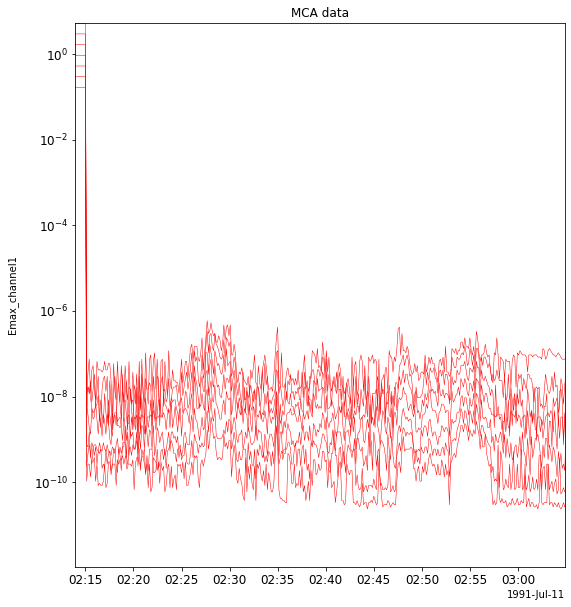

In [64]:
#pytplot.tlimit(['1991-07-11 00:00:00','1991-07-11 23:59:00'])
pytplot.tlimit([start_time,end_time])
options('Amplitude at 3.16-100 Hz', 'ylog', 1)
options('Amplitude at 3.16-100 Hz', 'zrange', [1e-8, 10])
tplot('Amplitude at 3.16-100 Hz')

In [65]:
Pass = pytplot.get_data('akb_orb_Pass')
start_pass_number = Pass.y[0]
pass_start_time = Pass.times[0]
for i in range(0, Pass.y.size):
    if start_pass_number < Pass.y[i+1]:
        pass_end_time = Pass.times[i]
        pass_number_index = i
        pass_start_time_string = pyspedas.time_string(pass_start_time, fmt = '%Y-%m-%d %H:%M:%S')
        pass_end_time_string = pyspedas.time_string(pass_end_time, fmt = '%Y-%m-%d %H:%M:%S')
        
        trange = [pass_start_time_string, pass_end_time_string]
        
        tlimit(trange)
        options('Emax_Amplitude', 'spec', 1)
        options('Emax_Amplitude', 'ylog', 1)
        options('Emax_Amplitude', 'zlog', 1)
        options('Emax_Amplitude', 'zrange', [1e-5, 1])
        options('Emax_Amplitude', 'yrange', [1, 2e4])
        options('Emax_Amplitude', 'ztitle', '[mV/m/Hz^1/2]')
        options('akb_orb_ALT', 'ylabel', 'ALT [km]')
        options('akb_orb_MLT', 'ylabel', 'MLT [h]')
        options('akb_orb_ILAT', 'ylabel', 'ILAT [deg]')
        options('akb_orb_MLAT', 'ylabel', 'MLAT [deg]')
        tplot_options('title', pass_start_time_string + '-' + pass_end_time_string + 'MCA data' )
        tplot('Emax_Amplitude', var_label = ['akb_orb_ALT', 'akb_orb_MLT', 'akb_orb_ILAT', 'akb_orb_MLAT'], save_png = 'akb_'+ pass_start_time_string + '-' + pass_end_time_string + '_pass_number_test')

That name is currently not in pytplot


AttributeError: 'NoneType' object has no attribute 'y'